C:\Users\jenny\.conda\envs\research\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

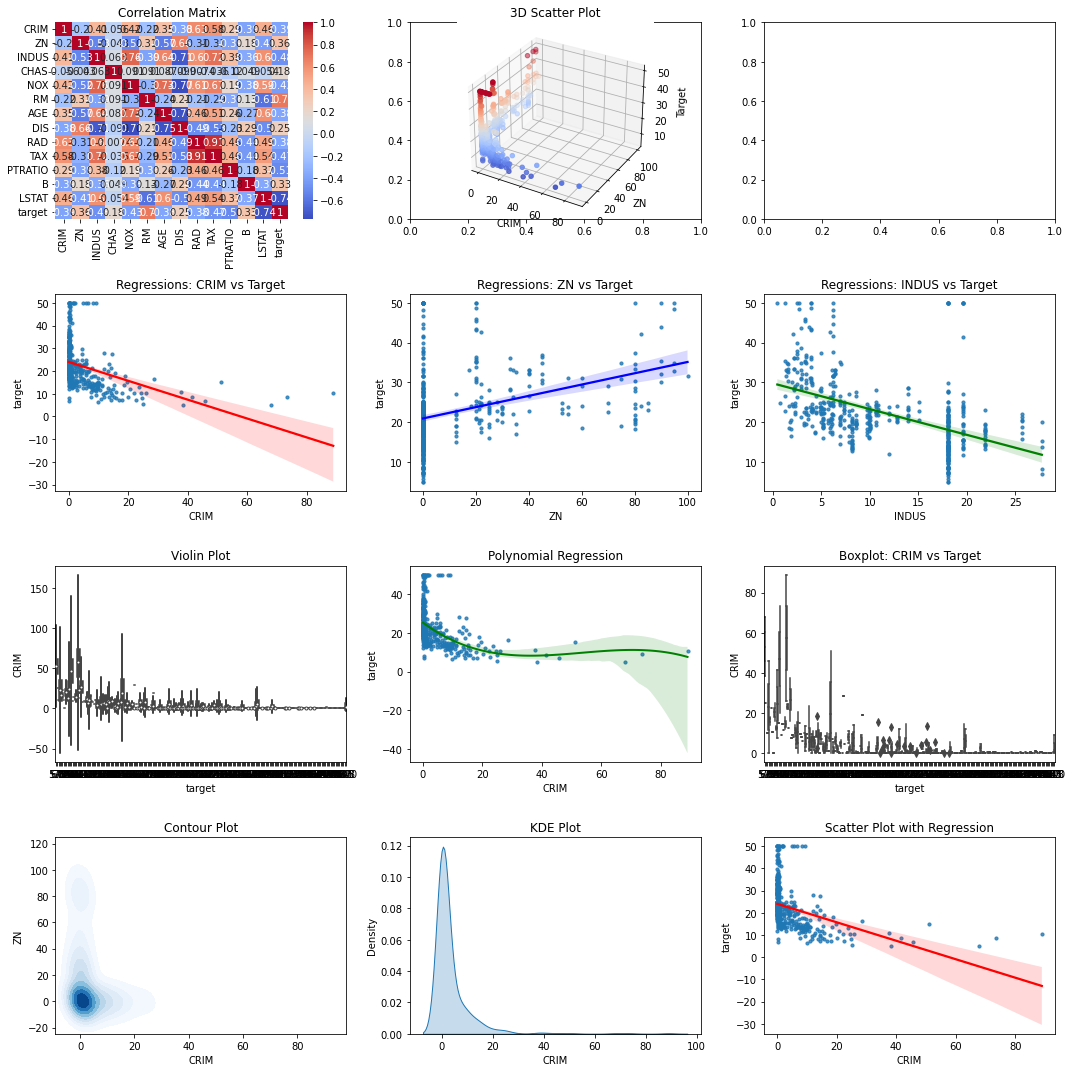

In [1]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
from scipy.stats import norm

# Loading a sample dataset
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Creating a figure to hold the subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# 1. Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix')

# 2. 3D Scatter Plot (First two features vs target)
ax = fig.add_subplot(4, 3, 2, projection='3d')
ax.scatter(df['CRIM'], df['ZN'], df['target'], c=df['target'], cmap='coolwarm')
ax.set_xlabel('CRIM')
ax.set_ylabel('ZN')
ax.set_zlabel('Target')
ax.set_title('3D Scatter Plot')

# 3. Multiple Regression (With 'CRIM', 'ZN', 'INDUS' against target)
sns.regplot(x='CRIM', y='target', data=df, scatter_kws={'s':10}, line_kws={'color': 'red'}, ax=axes[1, 0])
sns.regplot(x='ZN', y='target', data=df, scatter_kws={'s':10}, line_kws={'color': 'blue'}, ax=axes[1, 1])
sns.regplot(x='INDUS', y='target', data=df, scatter_kws={'s':10}, line_kws={'color': 'green'}, ax=axes[1, 2])
axes[1, 0].set_title('Regressions: CRIM vs Target')
axes[1, 1].set_title('Regressions: ZN vs Target')
axes[1, 2].set_title('Regressions: INDUS vs Target')

# 4. Violin Plot for 'CRIM' vs 'target'
sns.violinplot(x='target', y='CRIM', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Violin Plot')

# 5. Polynomial Regression
sns.regplot(x='CRIM', y='target', data=df, scatter_kws={'s':10}, line_kws={'color': 'green', 'lw':2}, order=3, ax=axes[2, 1])
axes[2, 1].set_title('Polynomial Regression')

# 6. Boxplot with categories
sns.boxplot(x='target', y='CRIM', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Boxplot: CRIM vs Target')

# 7. Contour Plot (based on 'CRIM' and 'ZN')
sns.kdeplot(x=df['CRIM'], y=df['ZN'], fill=True, cmap='Blues', ax=axes[3, 0])
axes[3, 0].set_title('Contour Plot')

# 8. Kernel Density Estimation (KDE) plot
sns.kdeplot(df['CRIM'], fill=True, ax=axes[3, 1])
axes[3, 1].set_title('KDE Plot')

# 9. Scatter plot with regression line (for 'CRIM' vs 'target')
sns.regplot(x='CRIM', y='target', data=df, ax=axes[3, 2], scatter_kws={'s':10}, line_kws={'color': 'red'})
axes[3, 2].set_title('Scatter Plot with Regression')

# 10. Combined Subplots: Displayed all in one chart for comparison
plt.tight_layout()

# Show the combined plots
plt.show()


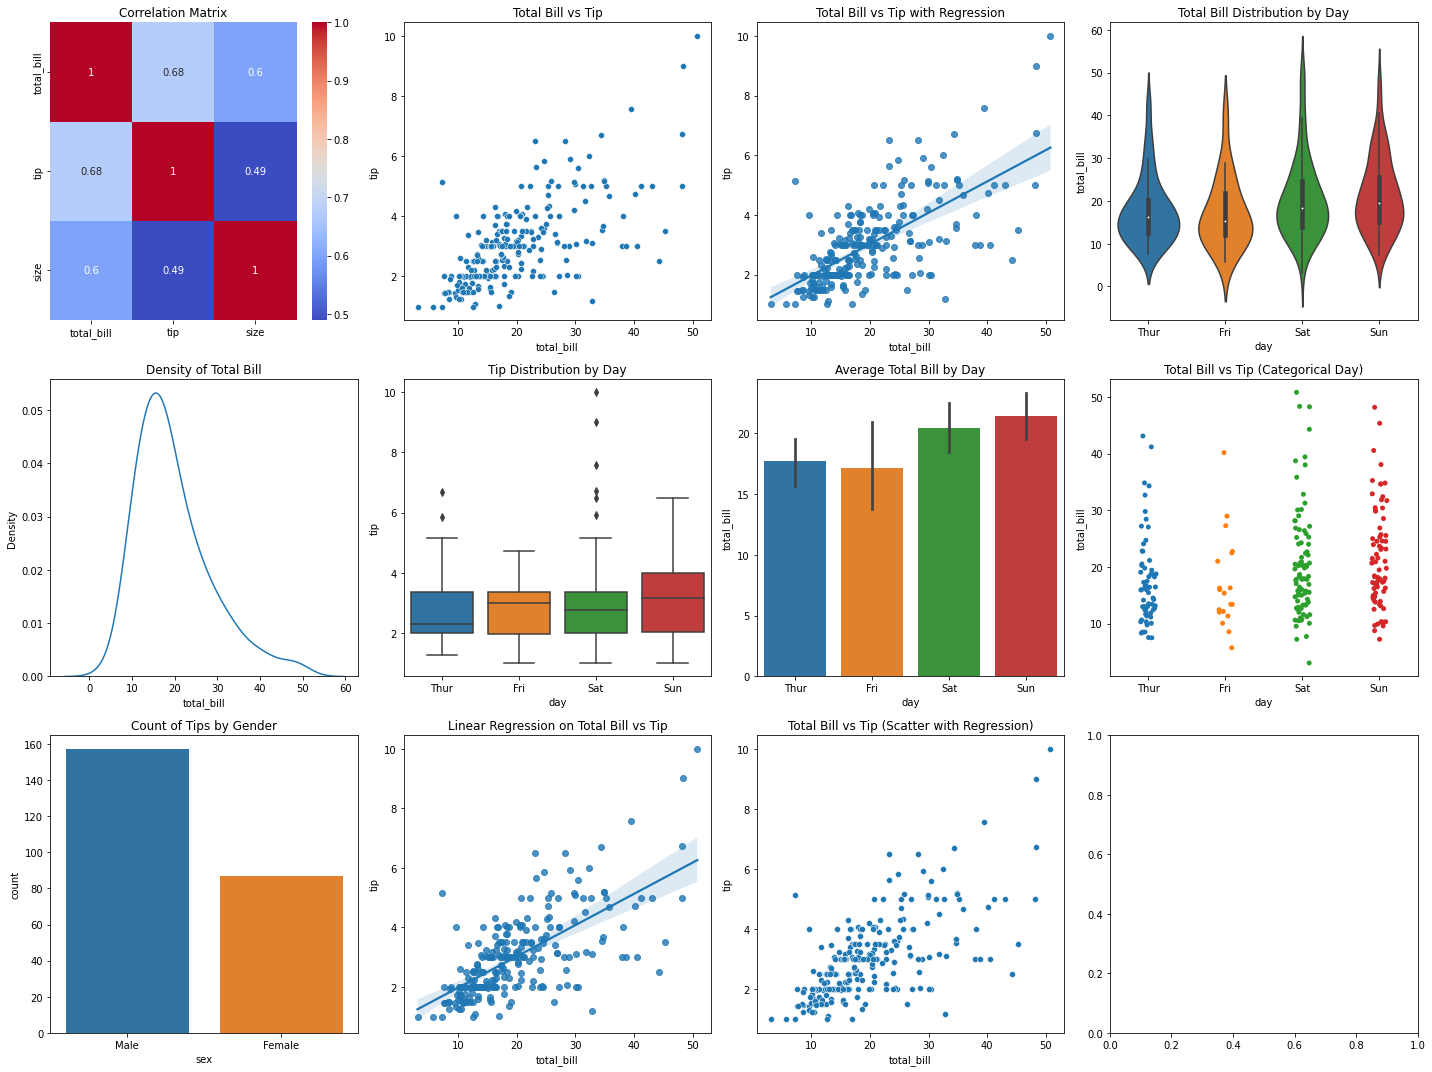

In [8]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the 'tips' dataset
data = sns.load_dataset('tips')

# Create a 3x4 grid for subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  
axes = axes.flatten()  # Flatten the array for easy access

# List of plot types and their titles (no repetitions)
plots = [
    ('heatmap', 'Correlation Matrix'),
    ('scatterplot', 'Total Bill vs Tip'),
    ('regplot', 'Total Bill vs Tip with Regression'),
    ('violinplot', 'Total Bill Distribution by Day'),
    ('kdeplot', 'Density of Total Bill'),
    ('boxplot', 'Tip Distribution by Day'),
    ('barplot', 'Average Total Bill by Day'),
    ('stripplot', 'Total Bill vs Tip (Categorical Day)'),
    ('countplot', 'Count of Tips by Gender'),
    ('regplot', 'Linear Regression on Total Bill vs Tip'),
    ('scatterplot', 'Total Bill vs Tip (Scatter with Regression)')
]

# Loop to plot each visualization
for i, (plot_type, title) in enumerate(plots):
    ax = axes[i]
    if plot_type == 'heatmap':
        corr_matrix = data.corr()  # Compute the correlation matrix
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
    elif plot_type == 'scatterplot':
        sns.scatterplot(x='total_bill', y='tip', data=data, ax=ax)
    elif plot_type == 'regplot':
        sns.regplot(x='total_bill', y='tip', data=data, ax=ax)
    elif plot_type == 'violinplot':
        sns.violinplot(x='day', y='total_bill', data=data, ax=ax)
    elif plot_type == 'kdeplot':
        sns.kdeplot(data['total_bill'], ax=ax)
    elif plot_type == 'boxplot':
        sns.boxplot(x='day', y='tip', data=data, ax=ax)
    elif plot_type == 'barplot':
        sns.barplot(x='day', y='total_bill', data=data, ax=ax)
    elif plot_type == 'stripplot':
        sns.stripplot(x='day', y='total_bill', data=data, ax=ax)
    elif plot_type == 'countplot':
        sns.countplot(x='sex', data=data, ax=ax)

    ax.set_title(title)  # Set the title for each subplot

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()
